Import necessary modules from tensorflow.keras

In [19]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import os

Training and validation data

In [9]:
train_data_dir = 'data/train/'
validation_data_dir = 'data/test/'

Create ImageDataGenerator for training 

Koden konfigurerar dataaugmentering och generatorer för träning och validering av bilder för en djupinlärningsmodell. Dataaugmentering tillämpas på träningsdata för att öka variationen, medan valideringsdata bara skalar om bilderna.

In [10]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    fill_mode='nearest')
# Create ImageDataGenerator for validation 
validation_datagen = ImageDataGenerator(rescale=1./255)

In [11]:
# Create an iterator for training data
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)
# Create an iterator for validation data
validation_generator = validation_datagen.flow_from_directory(
    validation_data_dir,
    color_mode='grayscale',
    target_size=(48, 48),
    batch_size=32,
    class_mode='categorical',
    shuffle=True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


Define class labels

In [12]:
class_label=['Angry', 'Disgust', 'Fear', 'Happy', 'Neutral', 'Sad', 'Surprise']

Images and labels 

In [13]:
img, label = train_generator.__next__()

Create model

Koden bygger en CNN-modell för bildklassificering med flera konvolutionslager, max pooling, dropout-lager för att minska överanpassning, och avslutande fullt anslutna lager för klassificering. Modellen kompileras med Adam-optimerare, kategorisk korsentropi-förlust och noggrannhetsmetrik.

In [14]:
# Sequential model
model = Sequential()

# Add layer with 32 filters, 3x3 kernel size, ReLU activation, and input shape 48x48x1
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(48, 48, 1)))

# Add another layer with 64 filters and ReLU activation
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))

# Add max pooling layer with 2x2 pool size
model.add(MaxPool2D(pool_size=(2, 2)))

# Add dropout layer to reduce overfitting
model.add(Dropout(0.1))

# Add layer with 128 filters and ReLU activation
model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))

# Add max pooling layer with 2x2 pool size
model.add(MaxPool2D(pool_size=(2, 2)))

# Add dropout layer to reduce overfitting
model.add(Dropout(0.2))

# Add convolutional layer with 256 filters and ReLU activation
model.add(Conv2D(256, kernel_size=(3, 3), activation='relu'))

# Add max pooling layer with 2x2 pool size
model.add(MaxPool2D(pool_size=(2, 2)))

# Add dropout layer to reduce overfitting
model.add(Dropout(0.2))

# Flatten the input data to create a single feature vector
model.add(Flatten())

# Add dense (fully connected) layer with 512 units and ReLU activation
model.add(Dense(512, activation='relu'))

# Add dropout layer to reduce overfitting
model.add(Dropout(0.5))

# Add dense layer with 7 units (one for each class) and softmax activation for classification
model.add(Dense(7, activation='softmax'))

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])


print(model.summary())

c:\Users\AHMAD\anaconda3\envs\python3115\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 44, 44, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 22, 22, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 20, 20, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 10, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,489,095 (9.50 MB)

 Trainable params: 2,489,095 (9.50 MB)

 Non-trainable params: 0 (0.00 B)

None


In [15]:
# Paths for training and test data
train_path ='data/train/'
test_path = 'data/test/'

Koden räknar antalet bilder i tränings- och testmappar och skriver ut resultaten.

In [16]:
# Calculate the number of training images
num_train_imgs = 0
for root, dirs, files in os.walk(train_path):
    num_train_imgs += len(files)
 # Calculate the number of test images   
num_test_imgs = 0
for root, dirs, files in os.walk(test_path):
    num_test_imgs += len(files)

# Print number of training and test images    
print(num_train_imgs)
print(num_test_imgs)

28709
7178


Den använder generatorer för tränings- och valideringsdata och kör träningen i upp till 100 epoker eller stannar tidigare om valideringsförlusten inte förbättras på 10 på varandra följande epoker.

In [17]:
# EarlyStopping callback to stop training when validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Set the number of epochs for training
epochs=100

# Train the model with training data, using the validation data for validation
history = model.fit(train_generator,
                    steps_per_epoch=num_train_imgs//32,
                    epochs=epochs,
                    validation_data=validation_generator,
                    validation_steps=num_test_imgs//32,
                    callbacks=[early_stopping])

Epoch 1/100


c:\Users\AHMAD\anaconda3\envs\python3115\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


897/897 ━━━━━━━━━━━━━━━━━━━━ 89s 96ms/step - accuracy: 0.2529 - loss: 1.8154 - val_accuracy: 0.3048 - val_loss: 1.7023
Epoch 2/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 91us/step - accuracy: 0.3750 - loss: 1.6313 - val_accuracy: 0.1000 - val_loss: 1.7122
Epoch 3/100


c:\Users\AHMAD\anaconda3\envs\python3115\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


897/897 ━━━━━━━━━━━━━━━━━━━━ 56s 62ms/step - accuracy: 0.2962 - loss: 1.7244 - val_accuracy: 0.4155 - val_loss: 1.5267
Epoch 4/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 36us/step - accuracy: 0.3438 - loss: 1.6800 - val_accuracy: 0.4000 - val_loss: 1.3285
Epoch 5/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 59s 65ms/step - accuracy: 0.3823 - loss: 1.5760 - val_accuracy: 0.4690 - val_loss: 1.4017
Epoch 6/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.3750 - loss: 1.6990 - val_accuracy: 0.6000 - val_loss: 1.2352
Epoch 7/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 56s 62ms/step - accuracy: 0.4188 - loss: 1.4955 - val_accuracy: 0.4925 - val_loss: 1.3068
Epoch 8/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 27us/step - accuracy: 0.4375 - loss: 1.5515 - val_accuracy: 0.4000 - val_loss: 1.4776
Epoch 9/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 56s 62ms/step - accuracy: 0.4447 - loss: 1.4416 - val_accuracy: 0.5225 - val_loss: 1.2607
Epoch 10/100
897/897 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - accuracy: 0.5000 - loss: 1.3182 - val_acc

Save the trained model 

In [18]:
model.save('model_fite.h5')

Genom att rita dessa grafer kan du visuellt inspektera modellens tränings- och valideringsprestanda.
Om träningsnoggrannheten/förlusten fortsätter att förbättras/minskas medan valideringsnoggrannheten/förlusten börjar bli platå eller öka, kan det tyda på överanpassning, där modellen presterar bra på träningsdata men misslyckas med att generalisera till osynliga data.

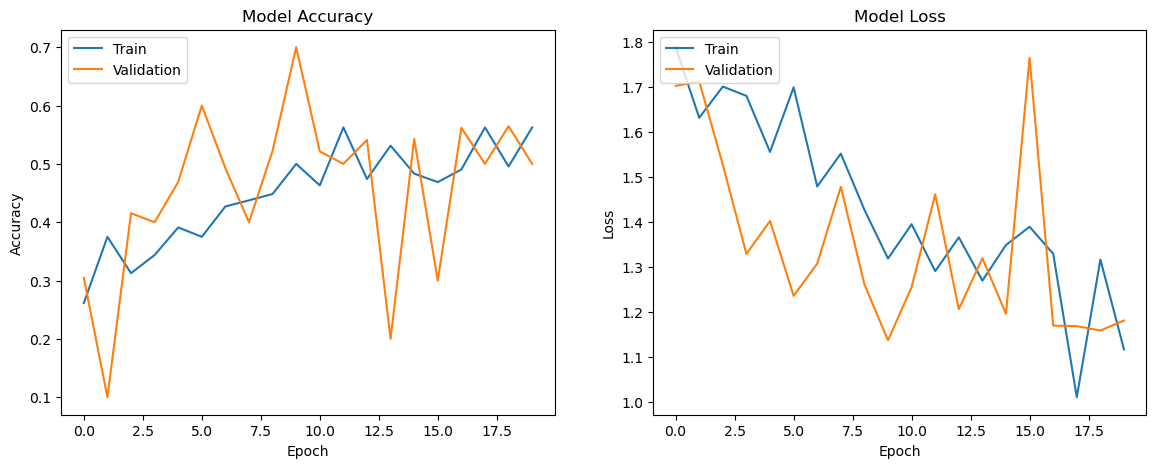

In [21]:
# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()